# Welcome to the ending of your second module at KS :)



The sharing of this workbook entails that you are moving on a good pace 🥰 Let's jump on to some advance stuff now, eh?

R E M E M B E R:       **PANDAS** documentation is going to be your bestie for this assignment!

### **PART 1 - GET TO KNOW YOUR DATA!**

This time we are going to pull data directly from the internet.

Step 1: Import the neccessary libraries.

In [387]:
import pandas as pd
import numpy as np

In [388]:
import requests
from pathlib import Path
import time 

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a URL and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    
    # Set up the directory path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir / Path(file)
    
    # Download if force is True or if file doesn't exist
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    
    return file_path

def head(filename, lines=5):
    """
    Returns the first few lines of a file.
    
    filename: the name of the file to open
    lines: the number of lines to include
    
    return: A list of the first few lines from the file.
    """
    from itertools import islice
    with open(filename, "r") as f:
        return list(islice(f, lines))


data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
file_name = "chipotle.tsv"
file_path = fetch_and_cache(data_url, file_name)

# Preview the first few lines
for line in head(file_path, lines=5):
    print(line)


Using cached version that was downloaded (UTC): Sat Oct 26 16:44:32 2024
order_id	quantity	item_name	choice_description	item_price

1	1	Chips and Fresh Tomato Salsa	NULL	$2.39 

1	1	Izze	[Clementine]	$3.39 

1	1	Nantucket Nectar	[Apple]	$3.39 

1	1	Chips and Tomatillo-Green Chili Salsa	NULL	$2.39 



Step 2: Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and save it in a variable named food.

In [389]:
#Hint: to get the date, check what sort of delimiter would you use?
food=pd.read_csv('./data/chipotle.tsv',sep='\t')

Step 3: I want to see what the first ten rows of the dataset looks like. How?

In [390]:
food.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 4. What is the number of observations in the dataset?

In [391]:
print(f'There are {food.shape[0]} observations are in the data.')

There are 4622 observations are in the data.


Step 5. What is the number of columns in the dataset?

In [392]:
print(f'There are {food.shape[1]} columns in the data.')

There are 5 columns in the data.


Step 6. Print the name of all the columns.

In [393]:
food.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 7. How is the dataset indexed?

In [394]:
'''Hint: think or look for a command that gives information 
about the dataset but this time, only the index from the dataset.'''
print(food.index)

RangeIndex(start=0, stop=4622, step=1)


Step 8. Which was the most-ordered item?

In [395]:
most_order_item=food['item_name'].value_counts()
most_order_item=most_order_item.idxmax()
print('Most ordered item:',most_order_item)

Most ordered item: Chicken Bowl


Step 9. For the most-ordered item, how many items were ordered?

In [396]:
most_order_item_count=food['item_name'].value_counts(ascending=False)
most_order_item_count=most_order_item_count.head(1)
most_order_item_count

item_name
Chicken Bowl    726
Name: count, dtype: int64

Step 10. What was the most ordered item in the choice_description column?

In [397]:
most_ordered_choices = food['choice_description'].value_counts()
most_ordered_choices=most_ordered_choices.idxmax()
print('The most ordered item in choice discription is',most_ordered_choices)

The most ordered item in choice discription is [Diet Coke]


Step 11. How many items were orderd in total?

In [398]:
total_items_ordered = food['quantity'].sum()
# Print the result
print(f'Total items ordered: {total_items_ordered}')

Total items ordered: 4972


Step 12. Turn the item price into a float

In [399]:
food['item_price'].dtypes

dtype('O')

In [400]:
food['item_price']=food['item_price'].apply(lambda x:x.replace('$',''))

Step 12.a. Check the item price type

In [401]:
#check itemprice type before changing  it
food['item_price'].dtypes

dtype('O')

Step 12.b. Create a lambda function and change the type of item price.

In [402]:
#Hint: You can first create a lambda function and then store it in a variable. After that, you can (APPLY) it on the relevant column :)
food['item_price']=food['item_price'].apply(lambda x: float(x))

Step 12.c. Check the item price type now

In [403]:
#make sure the itemprice type has changed now
food['item_price'].dtypes

dtype('float64')

Step 13. How much was the revenue for the period in the dataset?

In [404]:
#Hint: Revenue = Quantity into ItemPrice
# Calculate the revenue for each item
food['revenue'] = food['quantity'] * food['item_price']

# Calculate the total revenue
total_revenue = food['revenue'].sum()

print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $39237.02


In [405]:
food.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


Step 14. How many orders were made in the period?

In [406]:
total_orders = food['order_id'].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 1834


Step 15. What is the average revenue amount per order?

In [407]:
average_revenue_per_order = total_revenue / total_orders
print(f"Average Revenue per Order: ${average_revenue_per_order:.2f}")

Average Revenue per Order: $21.39


Step 16. How many different items are sold?

In [408]:
No_of_items=food['item_name'].nunique()
print(f'There are {No_of_items} different items which are sold.')

There are 50 different items which are sold.


### **Part 2 - FILTER AND SORT YOUR DATA!**

Step 17. How many products cost more than $10.00?

In [409]:
# you already  converted the itemprice into flaot, now delete the duplicates in item_name and quantity.
# select only the products with quantity equals to 1 and then print the unqiue count only
unique_items = food[['item_name', 'quantity']].drop_duplicates()

# Step 2: Select only the products with quantity equals to 1
products_with_quantity_one = unique_items[unique_items['quantity'] == 1]
# Count products that cost more than $10.00
products_above_10 = food[food['item_price'] > 10.00]
# Get the count of those products
count_above_10 = products_above_10['item_name'].nunique()

print(f'The number of products that cost more than $10.00 are: {count_above_10}')

The number of products that cost more than $10.00 are: 31


Step 18. Sort by the name of the item

In [410]:
print(food.sort_values(by='item_name'))

      order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
341        148         1  6 Pack Soft Drink   
1849       749         1  6 Pack Soft Drink   
1860       754         1  6 Pack Soft Drink   
2713      1076         1  6 Pack Soft Drink   
...        ...       ...                ...   
2384       948         1  Veggie Soft Tacos   
781        322         1  Veggie Soft Tacos   
2851      1132         1  Veggie Soft Tacos   
1699       688         1  Veggie Soft Tacos   
1395       567         1  Veggie Soft Tacos   

                                     choice_description  item_price  revenue  
3389                                        [Diet Coke]       12.98    25.96  
341                                         [Diet Coke]        6.49     6.49  
1849                                             [Coke]        6.49     6.49  
1860                                        [Diet Coke]        6.49     6.49  
2713                                    

Step 19. What was the quantity of the most expensive item ordered?

In [411]:
max_price = food['item_price'].max()
most_expensive_item = food[food['item_price'] == max_price]
most_expensive_item

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


Step 20. How many times did someone order more than one Canned Soda?

In [412]:
#Hint: you can also use boolean condition
count_canned_soda_orders = (food['item_name'] == 'Canned Soda') & (food['quantity'] > 1)
total_canned_soda_orders = count_canned_soda_orders.sum()

print(f'The number of times someone ordered more than one Canned Soda is: {total_canned_soda_orders}')

The number of times someone ordered more than one Canned Soda is: 20


BONUS QUESTION: Pandas is used for Data Analysis. Create some unique pandas insight from your dataset and code it here.

Bonus:What is the cheapest item by price?

In [413]:
# Find the cheapest item based on item price
cheapest_item = food.loc[food['item_price'].idxmin()]

# Print the details of the cheapest item
print("Cheapest Item:")
print(f"Item Name: {cheapest_item['item_name']}")
print(f"Price: ${cheapest_item['item_price']}")


Cheapest Item:
Item Name: Canned Soda
Price: $1.09


Bonus Question is optional, but attempting it would result in 5 Grace Points :)

### **THE END!!!**
or maybe not :)


We still need to practice Grouping more.

### **PART 3 - GROUPING!!**

But now, we will be changing our dataset a bit. Get your dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user) and store it in a variable called users.

In [414]:
data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
file_name = "user.user"
file_path = fetch_and_cache(data_url, file_name)

Using cached version that was downloaded (UTC): Sat Oct 26 21:11:45 2024


In [415]:
users=pd.read_csv('./data/user.user',sep='|')

In [416]:
#Hint: this time, you may need to change your choice of delimieter. Check and see how the values are being seperated.
#Also this time, be on a lookout of what column would you use as an index?
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 1. Discover what is the mean age per occupation

In [417]:
# Calculate mean age per occupation and round it
mean_age_per_occupation = round(users.groupby('occupation')['age'].mean())
mean_age_per_occupation


occupation
administrator    39.0
artist           31.0
doctor           44.0
educator         42.0
engineer         36.0
entertainment    29.0
executive        39.0
healthcare       42.0
homemaker        33.0
lawyer           37.0
librarian        40.0
marketing        38.0
none             27.0
other            35.0
programmer       33.0
retired          63.0
salesman         36.0
scientist        36.0
student          22.0
technician       33.0
writer           36.0
Name: age, dtype: float64

Step 2. Discover the Male ratio per occupation and sort it from the most to the least

In [418]:
#The output of this cell is given below. Your output should match this!
#In Simple words, you have to calculate the percentage of male users grouped by their occupation.

# Count the total number of people per occupation
total_per_occupation = users['occupation'].value_counts()
# Count the number of males per occupation
males_per_occupation = users[users['gender'] == 'M']['occupation'].value_counts()
# Calculate the male ratio per occupation
male_ratio_per_occupation = (males_per_occupation / total_per_occupation).sort_values(ascending=False)
male_ratio_per_occupation*100

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: count, dtype: float64

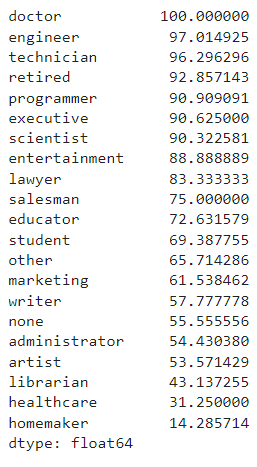

Step 3. For each occupation, calculate the minimum and maximum ages

In [419]:
min_max_age=users.groupby('occupation')['age'].agg(['min','max'])
min_max_age.columns=['Min Age','Max Age']
min_max_age

,Min Age,Max Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 4.  For each combination of occupation and gender, calculate the mean age

In [420]:
min_max_age=users.groupby('occupation')['age'].agg(['min','max','mean'])
min_max_age.columns=['Min Age','Max Age','Mean Age']
min_max_age

,Min Age,Max Age,Mean Age
occupation,,,
administrator,21,70,38.746835
artist,19,48,31.392857
doctor,28,64,43.571429
educator,23,63,42.010526
engineer,22,70,36.388060
entertainment,15,50,29.222222
executive,22,69,38.718750
healthcare,22,62,41.562500
homemaker,20,50,32.571429


Step 5. For each occupation present the percentage of women and men

In [421]:
# Total male and female count per occupation
male_count = users[users['gender'] == 'M'].groupby('occupation').size()
female_count = users[users['gender'] == 'F'].groupby('occupation').size()

# Calculate total count per occupation
total_count_per_occupation = male_count.add(female_count, fill_value=0)

# Calculate percentage of males and females per occupation
male_percentage = (male_count / total_count_per_occupation) * 100
female_percentage = (female_count / total_count_per_occupation) * 100

# Combine into a DataFrame
gender_percentage_df = pd.DataFrame({
    'Percentage of Males': male_percentage,
    'Percentage of Females': female_percentage
}).fillna(0)
# Sort by Percentage of Males
gender_percentage_df = gender_percentage_df.sort_values(by='Percentage of Males', ascending=False)

gender_percentage_df


,Percentage of Males,Percentage of Females
occupation,,
doctor,100.000000,0.000000
engineer,97.014925,2.985075
technician,96.296296,3.703704
retired,92.857143,7.142857
programmer,90.909091,9.090909
executive,90.625000,9.375000
scientist,90.322581,9.677419
entertainment,88.888889,11.111111
lawyer,83.333333,16.666667


Easy, right? I knew you could do it 💯

You are just left with 2 modules :)

### **PART 4 - APPLY**

Get your data from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv) and store it in a variable called crime

In [422]:
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'
file_name = "crime.csv"
file_path = fetch_and_cache(data_url, file_name)

Using cached version that was downloaded (UTC): Sat Oct 26 21:57:45 2024


In [423]:
#read your data and display first 5 rows
crime=pd.read_csv('./data/crime.csv')
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


Step 1. What is the type of the columns?

In [424]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

Step 2. Convert the type of the column Year to datetime64

In [425]:
crime['Year'] = pd.to_datetime(crime['Year'], format='%Y')

Step 3. Set the Year column as the index of the dataframe

In [426]:
crime.set_index('Year', inplace=True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


Step 4. Delete the Total column

In [427]:
crime.drop(columns='Total',inplace=True)

Step 5. Group the year by decades and sum the values.

***Pay attention to the Population column number, summing this column is a mistake***

In [428]:
crime['Decade'] = (crime.index.year // 10) * 10
# Group by decade and sum the values
decade_summary = crime.groupby('Decade').sum()
decade_summary

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Decade,,,,,,,,,,
1960,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [430]:
print(crime['Population'].dtype)  # Check the data type of the Population column

int64


Bonus Question: What is the most dangerous decade to live in the US?

In [431]:
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Decade
Year,,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,1960
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,1960
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,1960
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,1960
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,1960


In [432]:
#Hint: Violent shows how dangerous the decade is
dangrous_decade=crime.groupby('Decade')['Violent'].max()
dangrous_decade.idxmax()

1990

### **PART 5 - MERGE/JOIN**

For this one, we will create our own dataset.

We will be dealing with both Numpy and Pandas in this one.

Step 1. Import the necessary libraries

In [433]:
import numpy as np
import pandas as pd

Step 2. **Create 3 differents Series, each of length 100, as follows:**

1. The first a random number from 1 to 4

2. The second a random number from 1 to 3

3. The third a random number from 10,000 to 30,000

In [434]:
#name them s1,s2,s3
# Create the first Series with random integers from 1 to 4
np.random.seed(0)
s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

Step 3. Let's create a DataFrame by joinning the Series by column.

In [435]:
#try concat, but figure out the axis on your own :)
# Create a DataFrame by joining the Series
series = pd.DataFrame({
    'First': s1,
    'Second': s2,
    'Third': s3
})
series

,First,Second,Third
0,1,2,15021
1,4,3,11134
2,2,1,26409
3,1,1,19680
4,4,3,27340
...,...,...,...
95,1,2,28161
96,3,2,29745
97,4,1,18338
98,2,1,24676


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [436]:
series.columns=['bedrs','bathrs','price_square_meter']

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [437]:
np.random.seed(0)
# Sample data
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Concatenate the Series into a single DataFrame
bigcolumn =series1,series2,series3
bigcolumn

(0     1
 1     4
 2     2
 3     1
 4     4
      ..
 95    1
 96    3
 97    4
 98    2
 99    1
 Length: 100, dtype: int32,
 0     2
 1     3
 2     1
 3     1
 4     3
      ..
 95    2
 96    2
 97    1
 98    1
 99    1
 Length: 100, dtype: int32,
 0     15021
 1     11134
 2     26409
 3     19680
 4     27340
       ...  
 95    28161
 96    29745
 97    18338
 98    24676
 99    12562
 Length: 100, dtype: int32)

In [438]:
#join concat the values but still change the series into a df as well
df=pd.DataFrame(pd.concat([series1, series2, series3]), columns=['Values'])
df

,Values
0,1
1,4
2,2
3,1
4,4
...,...
95,28161
96,29745
97,18338
98,24676


Oops, it seems it is going only until index 99. Is it true?

In [441]:
#This question warrants a theoretical response. No code is required in this cell block

#If no, then why not?

#If yes, then why yes?
'''Yes, the index stops at 99 because each of the three Series has its own index range of 0 to 99. 
When they are concatenated using pd.concat without resetting the index, the 
DataFrame retains the original indices of each Series, 
leading to duplicate indices rather than a continuous range from 0 to 299.'''

'Yes, the index stops at 99 because each of the three Series has its own index range of 0 to 99. \nWhen they are concatenated using pd.concat without resetting the index, the \nDataFrame retains the original indices of each Series, \nleading to duplicate indices rather than a continuous range from 0 to 299.'

Step 6. Reindex the DataFrame so it goes from 0 to 299

In [440]:
df = pd.DataFrame(pd.concat([series1, series2, series3], ignore_index=True), columns=['Values'])
df

,Values
0,1
1,4
2,2
3,1
4,4
...,...
295,28161
296,29745
297,18338
298,24676


### ***TA-DA. That's it. THE END!***